Sept 2025 Ispitni zadatak
U projektu kreirati folder 'ispiti' i u njemu dva foldera: 'data' i 'notebooks'. U notebooks kreirati jupyter notebook pod nazivom 'adoption.ipynb'

1. Učitaj dataset,
obriši REDOVE sa NaN vrednostima,
izbaciti kolone PetID, Vaccinated, HealthCondition i PetType. (nisam siguran da li je bilo PetType, ali svakako nije bitno)
Izbaciti redove gde Size nije jednako: 'Small', 'Medium' ili 'Large
sačuvati očišćen dataset u 'adoption_clean.csv'

2. U očišćenom datasetu, napraviti kolonu AgeYears. AgeYears dobijamo tako što AgeMonths podelimo sa 12 i zaokružimo na ceo broj. Nakon kreiranja proveriti da li su sve vrednosti u koloni AgeYears tipa int. Staviti da kolona AgeYears bude ispred AgeMonths.

3. Prikazati srednju vrednost TimeInShelterDays po godinama AgeYears u vidu linijskog plota.

4. Preko bargrapha prikazati za svaku kategoriju Size, prosečnu vrednost za WeightKg.

Učitavanje potrebnih biblioteki

In [42]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


Učitavanje dataset-a

In [43]:
DATA_DIR = Path.cwd().parent / 'data'

adoption_df = pd.read_csv(DATA_DIR / 'adoption.csv')

adoption_df

,PetID,PetType,AgeMonths,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays
0,500,Bird,131,Large,5.039768,1,0,27
1,501,Rabbit,73,Large,16.086727,0,0,8
2,502,Dog,136,Medium,2.076286,0,0,85
3,503,Bird,97,Small,3.339423,0,0,61
4,504,Rabbit,123,Large,20.498100,0,0,28
...,...,...,...,...,...,...,...,...
2002,2502,Dog,72,Small,27.039045,1,0,66
2003,2503,Rabbit,124,Small,4.726954,1,1,59
2004,2504,Rabbit,113,Small,1.758592,1,0,68
2005,2505,Dog,12,Large,20.961592,1,0,59


Brisanje redova sa NaN vrednostima (U OVOM DATASETU IZGLEDA DA NEMA NAN VREDNOSTI, ALI ISPOD IMATE KAKO SE RADI)

In [44]:
adoption_df.isna().sum()

PetID                0
PetType              0
AgeMonths            0
Size                 0
WeightKg             0
Vaccinated           0
HealthCondition      0
TimeInShelterDays    0
dtype: int64

In [45]:
adoption_df.isna().sum().sum()

np.int64(0)

In [46]:
adoption_df.dropna(how='any', inplace=True)

In [47]:
adoption_df.isna().sum().sum()

np.int64(0)

Izbacivanje kolona PetID, Vaccinated, HealthCondition i PetType

In [48]:
adoption_df.columns

Index(['PetID', 'PetType', 'AgeMonths', 'Size', 'WeightKg', 'Vaccinated',
       'HealthCondition', 'TimeInShelterDays'],
      dtype='object')

In [49]:
adoption_df.drop(columns=['PetID', 'Vaccinated', 'HealthCondition', 'PetType'], inplace=True)
adoption_df

,AgeMonths,Size,WeightKg,TimeInShelterDays
0,131,Large,5.039768,27
1,73,Large,16.086727,8
2,136,Medium,2.076286,85
3,97,Small,3.339423,61
4,123,Large,20.498100,28
...,...,...,...,...
2002,72,Small,27.039045,66
2003,124,Small,4.726954,59
2004,113,Small,1.758592,68
2005,12,Large,20.961592,59


Izbacivanje redova gde Size nije Small, Medium ili Large (NA ISPITU JE SU BILA 2 REDA, GDE JE SIZE BIO UNKNOWN)

Ovako biste proverili redove koji nemaju Size koji je 'Small','Medium' ili 'Large'

~ služi za negaciju

In [50]:
adoption_df.loc[~adoption_df.Size.isin(['Small','Medium', 'Large'])]

,AgeMonths,Size,WeightKg,TimeInShelterDays


Nama trebaju SAMO vrednosti gde je Size 'Small', 'Medium' ili 'Large'

In [51]:
adoption_df = adoption_df.loc[adoption_df.Size.isin(['Small','Medium', 'Large'])].copy()

Čuvanje očišćenog dataseta

In [52]:
adoption_df.to_csv(DATA_DIR / 'adoption_clean.csv', index=False)

adoption_clean = pd.read_csv(DATA_DIR / 'adoption_clean.csv')  #Ovo nije neophodno da radite, možete da nastavite da koristite adoption_df
adoption_clean


,AgeMonths,Size,WeightKg,TimeInShelterDays
0,131,Large,5.039768,27
1,73,Large,16.086727,8
2,136,Medium,2.076286,85
3,97,Small,3.339423,61
4,123,Large,20.498100,28
...,...,...,...,...
2002,72,Small,27.039045,66
2003,124,Small,4.726954,59
2004,113,Small,1.758592,68
2005,12,Large,20.961592,59


Kreiranje AgeMonths kolone

In [53]:
def age_years(value):
    return int (round(value / 12))  #može i bez round

adoption_clean['AgeYears'] = adoption_clean['AgeMonths'].apply(age_years)

adoption_clean

,AgeMonths,Size,WeightKg,TimeInShelterDays,AgeYears
0,131,Large,5.039768,27,11
1,73,Large,16.086727,8,6
2,136,Medium,2.076286,85,11
3,97,Small,3.339423,61,8
4,123,Large,20.498100,28,10
...,...,...,...,...,...
2002,72,Small,27.039045,66,6
2003,124,Small,4.726954,59,10
2004,113,Small,1.758592,68,9
2005,12,Large,20.961592,59,1


Stavljanje AgeYears kolone ispred AgeMonths

In [55]:
kolone = adoption_clean.columns.tolist() #uzmi sve kolone i upiši u listu
kolone.remove('AgeYears') #izbaci AgeYears iz liste
age_months_index = kolone.index('AgeMonths') #nađi index/mesto gde se nalazi AgeMonths u Listi
kolone.insert(age_months_index, 'AgeYears')  #ubaci AgeYears na mesto AgeMonths

kolone


['AgeYears', 'AgeMonths', 'Size', 'WeightKg', 'TimeInShelterDays']

In [57]:
adoption_clean = adoption_clean[kolone].copy()
adoption_clean

,AgeYears,AgeMonths,Size,WeightKg,TimeInShelterDays
0,11,131,Large,5.039768,27
1,6,73,Large,16.086727,8
2,11,136,Medium,2.076286,85
3,8,97,Small,3.339423,61
4,10,123,Large,20.498100,28
...,...,...,...,...,...
2002,6,72,Small,27.039045,66
2003,10,124,Small,4.726954,59
2004,9,113,Small,1.758592,68
2005,1,12,Large,20.961592,59


3. Prikazati srednju vrednost TimeInShelterDays po godinama AgeYears u vidu linijskog plota.

In [58]:
srednja_vrednost_po_godinama = adoption_clean.groupby('AgeYears')['TimeInShelterDays'].mean()

srednja_vrednost_po_godinama

AgeYears
0     40.757576
1     40.669231
2     43.842857
3     43.910891
4     43.021277
5     42.016393
6     46.265152
7     43.162602
8     40.316547
9     49.414815
10    43.880000
11    45.947826
12    46.397590
13    44.570312
14    42.050000
15    47.830508
Name: TimeInShelterDays, dtype: float64

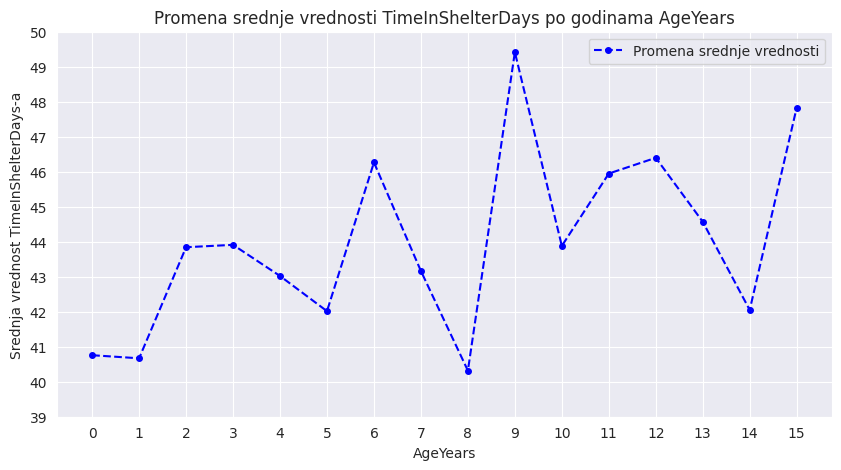

In [59]:
x = srednja_vrednost_po_godinama.index.tolist()
y = srednja_vrednost_po_godinama.values.tolist()


fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, y, color='blue', linestyle='--', marker='o', markersize=4, label='Promena srednje vrednosti')
ax.set_title('Promena srednje vrednosti TimeInShelterDays po godinama AgeYears')
ax.set_xlabel('AgeYears')
ax.set_ylabel('Srednja vrednost TimeInShelterDays-a')
ax.set_xticks(x)
ax.set_yticks(range(39, 51))
ax.legend()
plt.show()

4. Preko bargrapha prikazati za svaku kategoriju Size, prosečnu vrednost za WeightKg.

In [60]:
prosecna_vrednost_po_kategorijama = adoption_clean.groupby('Size')['WeightKg'].mean()

prosecna_vrednost_po_kategorijama

Size
Large     15.751370
Medium    15.790286
Small     15.571442
Name: WeightKg, dtype: float64

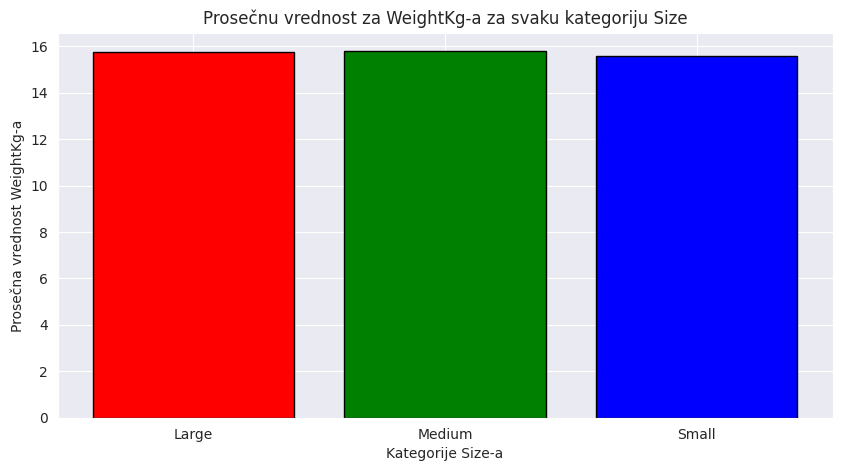

In [61]:
x = prosecna_vrednost_po_kategorijama.index.tolist()
y = prosecna_vrednost_po_kategorijama.values.tolist()


fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x, y, color=['red', 'green', 'blue', 'orange'], edgecolor='black')
ax.set_title('Prosečnu vrednost za WeightKg-a za svaku kategoriju Size')
ax.set_xlabel('Kategorije Size-a')
ax.set_ylabel('Prosečna vrednost WeightKg-a')
plt.show()